# PHYS 105: Computational Physics I
### Spring 2018
### In-Class Exercise 5.3

Name: Christopher Morris

**Instructions**:

   * **Repeat** Exercise 5.1 with the simple integration scheme for the case of the nonlinear oscillator with

$$
        \tt acc = -\ K x^3
$$
    
and K = 4 with $\delta t$ starting at 0.1. Find the order for this force.


   * **Repeat again**, but now using the modified integration scheme obtained by including the "jerk" (derivative of the acceleration) term **explicitly** in the velocity step:

\begin{eqnarray}
	\tt a &\ =& \tt acc(x, v, t)\\
    \tt j &\ =& \tt jerk(x, v, t)\\
	\tt x &\mathrel{+}=& \tt v*dt + 0.5*a*dt*dt\\
    \tt v &\mathrel{+}=& \tt a*dt + 0.5*j*dt*dt\\
    \tt t &\mathrel{+}=& \tt dt
\end{eqnarray}
    
Note that we only include the jerk in the velocity step, for the same reason as discussed in Exercise 5.2. That is, adding a higher order term $O(\delta t^3)$ in $x$ will not improve the order of the method.


The energy error for -1.0 is -0.115554984766
The energy error for -1.30102999566 is -0.620062504281
The energy error for -1.60205999133 is -1.00018330947
The energy error for -1.90308998699 is -1.33392916806
The energy error for -2.20411998266 is -1.6493973212
The energy error for -2.50514997832 is -1.95740868609
The energy error for -2.80617997398 is -2.26187333011
The energy error for -3.10720996965 is -2.56460705611
The energy error for -3.40823996531 is -2.86648556976
The energy error for -3.70926996098 is -3.16793899398
The Order: 1.00140659922


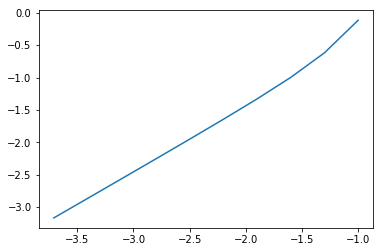

In [29]:
import sys, math
import matplotlib.pyplot as plt
import numpy as np

# FUNCTION DEFINITIONS ==============================

def interp(x0, y0, x1, y1, x=None, y=None):
    if y == None:
        return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    elif x == None:
        return (y-y0) * (x1 - x0) / (y1 - y0) + x0

# Particle Acceleration
def acc(x, v):
    return -K * x**3

def jerk(x,v):
    return -3 * K * x**2 * v

# Potential - calculated from acceleration
def potential(x):
    return .25 * K * x**4

# Total Energy
def energy(x, v):
    Etot = potential(x) + 0.5*v*v
    return Etot

# Analytic Solution - from lecture
def analytic_soln(t):
    x = .5 * V0 * math.sin(2*t)
    v = V0 * math.cos(2*t)
    return x, v

def output(x, v, t):
#     Print numerical and analytical solutions and the energy error
#     to cout.
    #print ('{:5.3f} {:5.3f} {:5.3f} {:5.3f}'.format(t, x, analytic_soln(t)[0], energy(x, v) - E0))
    pass

def take_a_step(x, v, t, dt):
    
    # Set the acceleration.
    a = acc(x, v)

    # Take the time step.
    
    xp = x
    x += v*dt + 0.5*a*dt*dt
    v += a*dt
    t += dt
    return xp, x, v, t

def check_zero(xp, x, t):
    if len(zeros_list) == 0:
        if (xp < 0) and (x >= 0):
            zeros_list.append(interp(t-dt, xp, t, x, y=0))
        
# MAIN PROGRAM =====================================
 
# Define constants and initial conditions
energy_list = []
dt_list = []
time_list = []
numerical_list = []
DT = .1
while DT >= 1e-4:
    dt_list.append(DT)
    X0 = 0
    V0 = 1
    K  = 4
    
    # Initialize the system.

    t    = 0
    x    = X0
    xp   = x
    v    = V0
    dt   = DT
    tmax = 1.5*math.pi

    # Initialize Plotting Lists

    # initial energy
    E0 = energy(x, v)
    dEmax = 0
    while t <= tmax:

        (xp, x, v, t) = take_a_step(x, v, t, dt)
        numerical_list.append(x)
        time_list.append(t)

        #Compute the maximum error.
        dE = energy(x, v) - E0
        if abs(dE) > dEmax: 
            dEmax = abs(dE)
    energy_list.append(dEmax)
    print('The energy error for {} is {}'.format(np.log10(DT), np.log10(dEmax)))
    
    DT /= 2
    
    
# Summarize to stderr.

# plt.figure(1)
# plt.plot(time_list, numerical_list, 'r-', label = 'Numerical')
# plt.plot(time_list, analytic_list, 'b--', label = 'Analytic')
# plt.title('Numerical and Analytic Plots VS Time.')
# plt.legend

# plt.figure(2)
# plt.plot(time_list, energy_list, 'g-')
# plt.title('Mechanical Energy as a function of time.')

# sys.stderr.write('V0 = {0:5.2f}, dt = {1:5.5f}, dEmax/E0 = {2:5.4f}'.format(V0,dt,dEmax))
# sys.stderr.write('\ndt to reduce absolute value is {}'.format(dt))


plt.plot(np.log10(dt_list), np.log10(energy_list), '-')
print('The Order: {}'.format((np.log10(energy_list)[-1] - np.log10(energy_list)[-2]) / 
                         (np.log10(dt_list)[-1] - np.log10(dt_list)[-2])))


The energy error for -1.0 is -1.78776672579
The energy error for -1.30102999566 is -2.49842630048
The energy error for -1.60205999133 is -3.16227525449
The energy error for -1.90308998699 is -3.79746328358
The energy error for -2.20411998266 is -4.41663104879
The energy error for -2.50514997832 is -5.02731941367
The energy error for -2.80617997398 is -5.6336854045
The energy error for -3.10720996965 is -6.23788509734
The energy error for -3.40823996531 is -6.8410071587
The energy error for -3.70926996098 is -7.44359443044
The Order: 2.01430422074


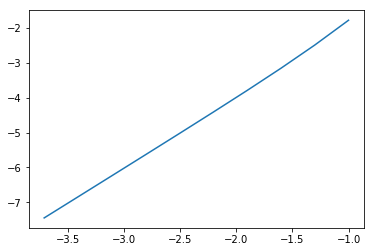

In [31]:
import sys, math
import matplotlib.pyplot as plt
import numpy as np

# FUNCTION DEFINITIONS ==============================

def interp(x0, y0, x1, y1, x=None, y=None):
    if y == None:
        return y0 + (y1 - y0) * (x - x0) / (x1 - x0)
    elif x == None:
        return (y-y0) * (x1 - x0) / (y1 - y0) + x0

# Particle Acceleration
def acc(x, v):
    return -K * x**3

def jerk(x,v):
    return -3 * K * x**2 * v

# Potential - calculated from acceleration
def potential(x):
    return .25 * K * x**4

# Total Energy
def energy(x, v):
    Etot = potential(x) + 0.5*v*v
    return Etot

# Analytic Solution - from lecture
def analytic_soln(t):
    x = .5 * V0 * math.sin(2*t)
    v = V0 * math.cos(2*t)
    return x, v

def output(x, v, t):
#     Print numerical and analytical solutions and the energy error
#     to cout.
    #print ('{:5.3f} {:5.3f} {:5.3f} {:5.3f}'.format(t, x, analytic_soln(t)[0], energy(x, v) - E0))
    pass

def take_a_step(x, v, t, dt):
    
    # Set the acceleration.
    a = acc(x, v)
    j = jerk(x, v)

    # Take the time step.
    
    xp = x
    x += v*dt + 0.5*a*dt*dt
    v += a*dt + .5*j*dt*dt
    t += dt
    return xp, x, v, t

def check_zero(xp, x, t):
    if len(zeros_list) == 0:
        if (xp < 0) and (x >= 0):
            zeros_list.append(interp(t-dt, xp, t, x, y=0))
        
# MAIN PROGRAM =====================================
 
# Define constants and initial conditions
energy_list = []
dt_list = []
DT = .1
while DT >= 1e-4:
    dt_list.append(DT)
    X0 = 0
    V0 = 1
    K  = 4
    
    # Initialize the system.

    t    = 0
    x    = X0
    xp   = x
    v    = V0
    dt   = DT
    tmax = 1.5*math.pi

    # Initialize Plotting Lists

    # initial energy
    E0 = energy(x, v)
    dEmax = 0
    while t <= tmax:

        (xp, x, v, t) = take_a_step(x, v, t, dt)

        #Compute the maximum error.
        dE = energy(x, v) - E0
        if abs(dE) > dEmax: 
            dEmax = abs(dE)
    energy_list.append(dEmax)
    print('The energy error for {} is {}'.format(np.log10(DT), np.log10(dEmax)))
    
    DT /= 2
    
    
# Summarize to stderr.

# plt.figure(1)
# plt.plot(time_list, numerical_list, 'r-', label = 'Numerical')
# plt.plot(time_list, analytic_list, 'b--', label = 'Analytic')
# plt.title('Numerical and Analytic Plots VS Time.')
# plt.legend

# plt.figure(2)
# plt.plot(time_list, energy_list, 'g-')
# plt.title('Mechanical Energy as a function of time.')

# sys.stderr.write('V0 = {0:5.2f}, dt = {1:5.5f}, dEmax/E0 = {2:5.4f}'.format(V0,dt,dEmax))
# sys.stderr.write('\ndt to reduce absolute value is {}'.format(dt))


plt.plot(np.log10(dt_list), np.log10(energy_list), '-')
print('The Order: {}'.format((np.log10(energy_list)[6] - np.log10(energy_list)[5]) / 
                         (np.log10(dt_list)[6] - np.log10(dt_list)[5])))